<a id="# Project about how to Tell a Story Using Data"></a> 

# Project about How to Tell a Story Using Data

 ## Project description <a id="some_id"></a> 

We’ve decided to open a small robot-run cafe in Los Angeles. The project is promising but expensive, so we and our partners decide to try to attract investors. They’re interested in the current market conditions—will we be able to maintain your success when the novelty of robot waiters wears off?
Our partners have asked to prepare some market research. We have open-source data on restaurants in LA.

## Description of the data <a id="Description"></a> 

**Data used in the first part of the project**

/datasets/rest_data_us.csv
- *object_name* — establishment name
- *chain* — chain establishment (TRUE/FALSE)
- *object_type* — establishment type
- *address* — address
- *number* — number of seats


## Loading and preprocessing the data <a id="3"></a> 

In [1]:
import pandas as pd
from scipy import stats as st
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import plotly.express as px
from scipy import stats
!pip install usaddress
import usaddress

In [2]:
rest_data=pd.read_csv('/datasets/rest_data_us.csv')

In [3]:
rest_data.head(10)

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20
5,11791,THE SPOT GRILL,10004 NATIONAL BLVD,False,Restaurant,14
6,11792,CPK,100 WORLD WAY # 126,False,Restaurant,100
7,11793,PHO LALA,3500 W 6TH ST STE 226,False,Restaurant,7
8,11794,ABC DONUTS,3027 N SAN FERNANDO RD UNIT 103,True,Fast Food,1
9,11795,UPSTAIRS,3707 N CAHUENGA BLVD,False,Restaurant,35


In [4]:
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


In [5]:
rest_data=rest_data.drop_duplicates()

In [6]:
rest_data['object_name']=rest_data['object_name'].str.lower()
rest_data['address']=rest_data['address'].str.lower()

In [7]:
rest_data['chain']=rest_data['chain'].astype(bool)

In [8]:
rest_data.head(10)

,id,object_name,address,chain,object_type,number
0,11786,habitat coffee shop,3708 n eagle rock blvd,False,Cafe,26
1,11787,reilly's,100 world way # 120,False,Restaurant,9
2,11788,street churros,6801 hollywood blvd # 253,False,Fast Food,20
3,11789,triniti echo park,1814 w sunset blvd,False,Restaurant,22
4,11790,pollen,2100 echo park ave,False,Restaurant,20
5,11791,the spot grill,10004 national blvd,False,Restaurant,14
6,11792,cpk,100 world way # 126,False,Restaurant,100
7,11793,pho lala,3500 w 6th st ste 226,False,Restaurant,7
8,11794,abc donuts,3027 n san fernando rd unit 103,True,Fast Food,1
9,11795,upstairs,3707 n cahuenga blvd,False,Restaurant,35


In [9]:
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9651 non-null   bool  
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: bool(1), int64(2), object(3)
memory usage: 461.8+ KB


**Now our data have right type and comfortable looking. It's ready for analysis.**

## Data analysis

### Let's investigating the proportions of the various types of establishments

In [10]:
rest_data_gr=rest_data.groupby('object_type')['object_name'].count().reset_index().sort_values(by='object_name',ascending=False)
rest_data_gr.columns=['object_type','amount']
rest_data_gr

,object_type,amount
5,Restaurant,7255
3,Fast Food,1066
2,Cafe,435
4,Pizza,320
1,Bar,292
0,Bakery,283


In [11]:
rest_data_gr['percent,%']=((rest_data_gr['amount']/rest_data_gr['amount'].sum())*100).map(lambda x:int("{0:.0f}".format(x)))
rest_data_gr

,object_type,amount,"percent,%"
5,Restaurant,7255,75
3,Fast Food,1066,11
2,Cafe,435,5
4,Pizza,320,3
1,Bar,292,3
0,Bakery,283,3


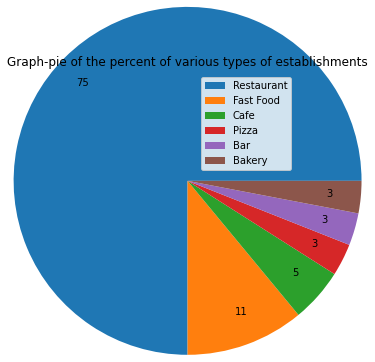

In [12]:
plt.pie(rest_data_gr['percent,%'],labels=rest_data_gr['percent,%'],radius=2,labeldistance=0.8),
plt.title('Graph-pie of the percent of various types of establishments')
plt.legend(rest_data_gr['object_type'])
plt.show()

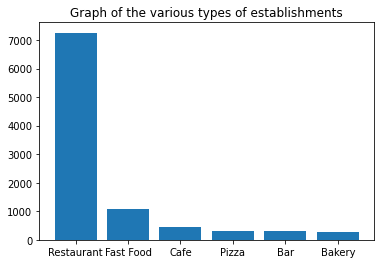

In [13]:
plt.bar(rest_data_gr['object_type'], rest_data_gr['amount'])
plt.title('Graph of the various types of establishments')
plt.show()

We can see from the graf, that most of the establishments are restaurant, 75%. On the second place is fast food. And other establishments is less than 5%.

### Let's investigating the proportions of chain and nonchain establishments

In [14]:
rest_data_gr=rest_data.groupby('chain')['object_name'].count().reset_index().sort_values(by='object_name',ascending=False)
rest_data_gr.columns=['chain','amount']


In [15]:
rest_data_gr

,chain,amount
0,False,5972
1,True,3679


In [16]:
rest_data_gr.loc[0,'chain']='nonchain'
rest_data_gr.loc[1,'chain']='chain'

In [17]:
rest_data_gr['percent,%']=((rest_data_gr['amount']/rest_data_gr['amount'].sum())*100).map(lambda x:int("{0:.0f}".format(x)))
rest_data_gr

,chain,amount,"percent,%"
0,nonchain,5972,62
1,chain,3679,38


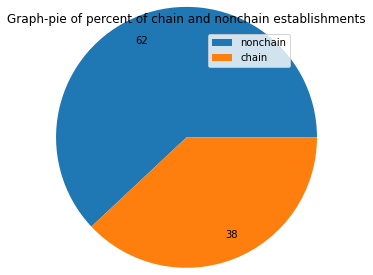

In [18]:
plt.pie(rest_data_gr['percent,%'],labels=rest_data_gr['percent,%'],radius=1.5,labeldistance=0.8),
plt.title('Graph-pie of percent of chain and nonchain establishments')
plt.legend(rest_data_gr['chain'])
plt.show()

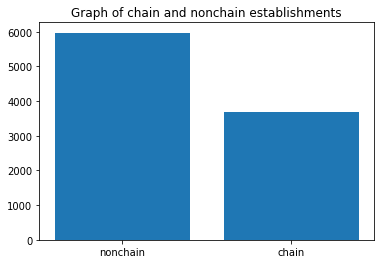

In [19]:
plt.bar(rest_data_gr['chain'], rest_data_gr['amount'])
plt.title('Graph of chain and nonchain establishments')
plt.show()

We can see from the graf, that most of the establishments are nonchain, 62%.

### Let's find which type of establishment is typically a chain

In [20]:
rest_data_grchain=rest_data.groupby(['object_type','chain'])['object_name'].count().reset_index().sort_values(by='object_name',ascending=False)

In [21]:
rest_data_grtype=rest_data.pivot_table(index='object_type',columns='chain',values='object_name',aggfunc='count').reset_index()

In [22]:
rest_data_grtype=rest_data_grtype.fillna(0)

In [23]:
rest_data_grtype.columns=['object_type','nonchain','chain']
rest_data_grtype

,object_type,nonchain,chain
0,Bakery,0.0,283.0
1,Bar,215.0,77.0
2,Cafe,169.0,266.0
3,Fast Food,461.0,605.0
4,Pizza,166.0,154.0
5,Restaurant,4961.0,2294.0


In [24]:
rest_data_grtype['all']=rest_data_grtype['nonchain']+rest_data_grtype['chain']
rest_data_grtype.sort_values(by='chain',ascending=False)

,object_type,nonchain,chain,all
5,Restaurant,4961.0,2294.0,7255.0
3,Fast Food,461.0,605.0,1066.0
0,Bakery,0.0,283.0,283.0
2,Cafe,169.0,266.0,435.0
4,Pizza,166.0,154.0,320.0
1,Bar,215.0,77.0,292.0


The most chain establishments is restaurants, like and most of the all of the establishments. But let's see which percent of every type is chain establishments.

In [25]:
rest_data_grtype['percent chain,%']=((rest_data_grtype['chain']/rest_data_grtype['all'])*100).map(lambda x:int("{0:.0f}".format(x)))
rest_data_grtype.sort_values(by='percent chain,%',ascending=False)

,object_type,nonchain,chain,all,"percent chain,%"
0,Bakery,0.0,283.0,283.0,100
2,Cafe,169.0,266.0,435.0,61
3,Fast Food,461.0,605.0,1066.0,57
4,Pizza,166.0,154.0,320.0,48
5,Restaurant,4961.0,2294.0,7255.0,32
1,Bar,215.0,77.0,292.0,26


In [26]:
rest_data_grtype['percent nonchain,%']=((rest_data_grtype['nonchain']/rest_data_grtype['all'])*100).map(lambda x:int("{0:.0f}".format(x)))
rest_data_grtype.sort_values(by='percent chain,%',ascending=False)
rest_data_grtype

,object_type,nonchain,chain,all,"percent chain,%","percent nonchain,%"
0,Bakery,0.0,283.0,283.0,100,0
1,Bar,215.0,77.0,292.0,26,74
2,Cafe,169.0,266.0,435.0,61,39
3,Fast Food,461.0,605.0,1066.0,57,43
4,Pizza,166.0,154.0,320.0,48,52
5,Restaurant,4961.0,2294.0,7255.0,32,68


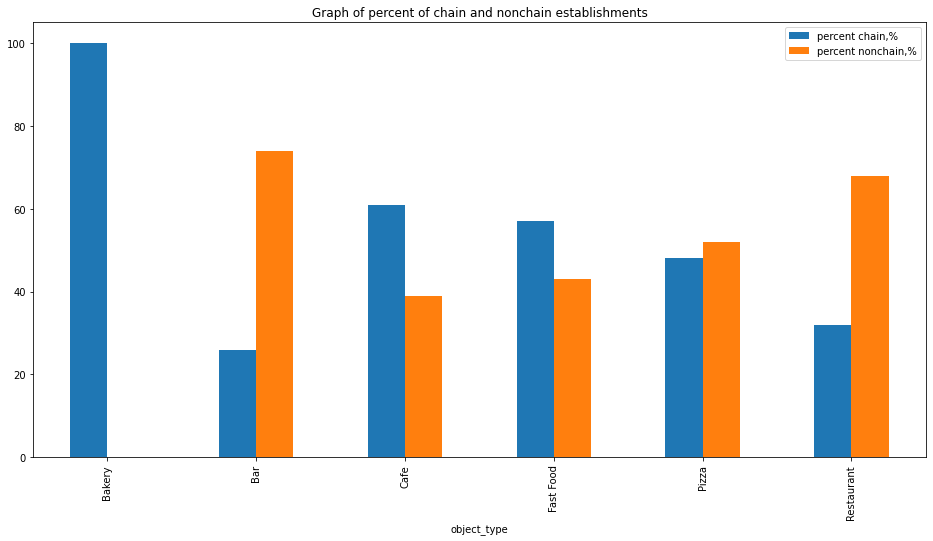

In [27]:
rest_data_grtype[['object_type','percent chain,%','percent nonchain,%']].plot(kind='bar',figsize=(16, 8),x='object_type')
plt.title('Graph of percent of chain and nonchain establishments')
plt.show()

We see another situation: the highest percent have - bakery, it's all chain. And cafe, fast food and pizza have 50-60% chain establishments. And restaurants have only 32% chain establishments.

### Let's know  what characterizes chains: many establishments with a small number of seats or a few establishments with a lot of seats.

In [28]:
rest_data_chain=rest_data[rest_data['chain']==True]
rest_data_chain

,id,object_name,address,chain,object_type,number
8,11794,abc donuts,3027 n san fernando rd unit 103,True,Fast Food,1
10,11796,el pollo loco,5319 w sunset blvd,True,Restaurant,38
11,11797,poong nyun bakery,928 s western ave ste 109,True,Bakery,17
12,11798,emc restaurant group llc,3500 w 6th st ste 101,True,Restaurant,133
14,11800,cuscatleca bakery,2501 w sunset blvd #a,True,Bakery,26
...,...,...,...,...,...,...
9629,21415,jucuapa bakery,2810 james wood blvd,True,Bakery,10
9636,21422,chipotle #3094,6719 la tijera blvd # a-b,True,Restaurant,47
9639,21425,mcdonald's,1800 s western ave,True,Fast Food,135
9648,21434,juicy wingz,6741 hollywood blvd,True,Fast Food,15


In [29]:
rest_data_chain['number'].describe()

count    3679.000000
mean       39.675455
std        43.426312
min         1.000000
25%        13.000000
50%        25.000000
75%        44.000000
max       229.000000
Name: number, dtype: float64

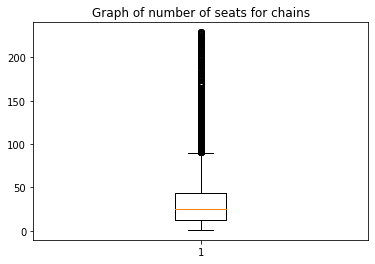

In [30]:
plt.boxplot(rest_data_chain['number'])
plt.title('Graph of number of seats for chains')
plt.show()

On graph we see that most of chains have a small number of seats, to 50. And of course they have many establishments, because it is chains.

In [31]:
A=rest_data_chain.pivot_table(index='object_name',values=['id','number'],aggfunc={'id':'count','number':'mean'}).reset_index()
A

,object_name,id,number
0,#1 chinese fast food,1,6.0
1,1810 restaurant,1,45.0
2,333,1,180.0
3,3rd st market & deli,1,7.0
4,4 caminos restaurant,1,18.0
...,...,...,...
2731,zankou chicken,2,53.5
2732,zen bakery (retail),1,19.0
2733,zermenos restaurant inc,1,10.0
2734,zion market deli & island,1,16.0


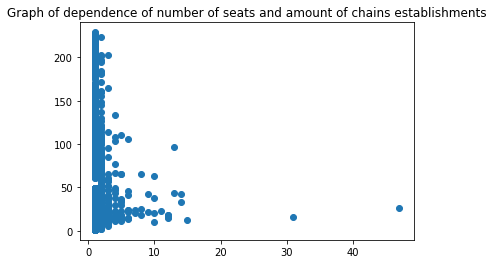

In [32]:
plt.scatter(A['id'],A['number'])
plt.title('Graph of dependence of number of seats and amount of chains establishments')
plt.show()

The establishments which have up to 5 eating points in the chain - to 200 seats. Establishments with more than 5 eating points generally have up to 50 seats.

### Let's count number of seats for  types of establishments.

The average number of seats for each type of establishments

In [33]:
rest_data.groupby('object_type')['number'].mean().round().reset_index().sort_values(by='number',ascending=False)

,object_type,number
5,Restaurant,48.0
1,Bar,45.0
3,Fast Food,32.0
4,Pizza,28.0
2,Cafe,25.0
0,Bakery,22.0


The number of seats does not differ much, however, the largest average number of seats - 48, have type - restaurant.

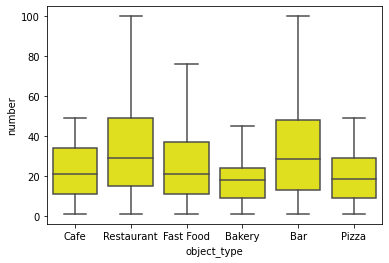

In [34]:
ax=sns.boxplot(x='object_type',y='number',data=rest_data, showfliers=False, color='yellow')

Based on the graph, we can also conclude that the number of places in chain establishments (bakery, pizza, cafes) is less than in non-chain establishments (bars and restaurants).

### Let's analysis address of establishments

#### Let's put the data on street names from the address column in a separate column.

In [35]:
def cleaning_street(raw):
    raw_address=usaddress.parse(raw)
    dict_address={}
    for i in raw_address:
        dict_address.update({i[1]:i[0]})
    #this line below checks for normal case with street and number    
    if 'StreetName' in dict_address.keys() and 'AddressNumber' in dict_address.keys():
        clean_adress=str(dict_address['StreetName'])
        return clean_adress

In [36]:
rest_data['clean_street']=rest_data.address.apply(cleaning_street)

In [37]:
rest_data

,id,object_name,address,chain,object_type,number,clean_street
0,11786,habitat coffee shop,3708 n eagle rock blvd,False,Cafe,26,rock
1,11787,reilly's,100 world way # 120,False,Restaurant,9,world
2,11788,street churros,6801 hollywood blvd # 253,False,Fast Food,20,hollywood
3,11789,triniti echo park,1814 w sunset blvd,False,Restaurant,22,sunset
4,11790,pollen,2100 echo park ave,False,Restaurant,20,park
...,...,...,...,...,...,...,...
9646,21432,hall of justice,217 w temple ave,False,Restaurant,122,temple
9647,21433,fin-melrose,5750 melrose ave,False,Restaurant,93,melrose
9648,21434,juicy wingz,6741 hollywood blvd,True,Fast Food,15,hollywood
9649,21435,medidate coffee,548 s spring st ste 100,False,Cafe,6,spring


#### Let's find the top ten streets by number of establishments.

In [38]:
rest_data_grstreet=rest_data.groupby('clean_street')['object_name'].count().reset_index().sort_values(by='object_name',ascending=False)
rest_data_grstreet.columns=['clean_street','amount']

In [39]:
rest_data_grstreet

,clean_street,amount
386,sunset,405
437,wilshire,398
334,pico,371
429,western,369
174,figueroa,334
...,...,...
228,idell,1
232,inglewood,1
235,japanese,1
236,jarvis,1


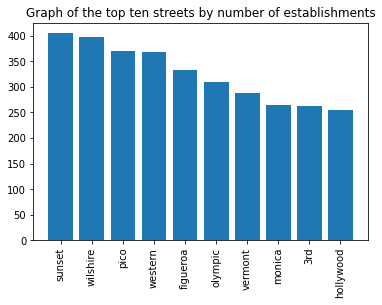

In [40]:
plt.bar(rest_data_grstreet.head(10)['clean_street'], rest_data_grstreet.head(10)['amount'])
plt.title('Graph of the top ten streets by number of establishments')
plt.xticks(rotation=90)
plt.show()

In [41]:
print('The number of streets that have one restaurant -',rest_data_grstreet[rest_data_grstreet['amount']==1]['clean_street'].count())

The number of streets that have one restaurant - 178


#### For streets with a lot of restaurants, let's look at the distribution of the number of seats.

In [42]:
rest_data_top=rest_data[rest_data['clean_street'].isin(rest_data_grstreet.head(10)['clean_street'])]

In [43]:
rest_data_top[['clean_street','number']].sort_values(by='clean_street')

,clean_street,number
7885,3rd,1
5126,3rd,17
8068,3rd,43
8064,3rd,36
8030,3rd,134
...,...,...
3342,wilshire,64
7065,wilshire,35
3347,wilshire,43
1924,wilshire,96


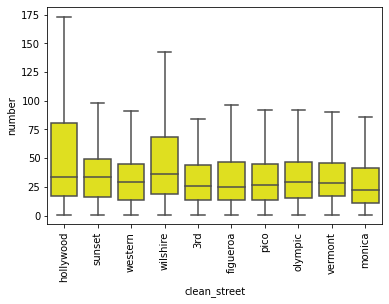

In [44]:
ax=sns.boxplot(x='clean_street',y='number',data=rest_data_top, showfliers=False, color='yellow')
plt.xticks(rotation=90)
plt.show()

From the graph, we can see that the average number of seats in the establishments on the streets "wilshire", "hollywood" and "sunset" is more than on others. Moreover, on the streets of "wilshire" and "Hollywood" there are establishments with a maximum number of seats - about 75.
The minimum number of seats on average on the street "monica" and "figueroa" - about 25.

## Сonclusion: 
Based on the task, we need to choose a street for the future cafe and the type of establishment that will be as profitable as possible if the cafe is operated by robots.<br> 
Obviously, for quick and error-free service, the cafe should be small, with a small number of seats. According to our **"graphs for the distribution of seats by type of establishments" from paragraphs 4.4 and 4.5**, this can be some kind of chain establishments: a **bakery,cafe, pizzeria or fast food.**<br> 
When choosing the street on which the establishment should be located, we will use **"Graph of the top ten streets by number of restaurants" from paragraph 4.6.2.** Most of the establishments are located on these streets, from which we can conclude that these streets are highly trafficked. Therefore, you should open a cafe on one of them.<br> 
To select a specific street, let's refer to **the chart on the distribution of seats in establishments on these streets from paragraph 4.6.3**. On the one hand, **Monika Street** can fit us, since it is there that small cafes are located, which can accommodate **about 25 seats.** This is exactly the type of establishment that we want to open.<br> 
On the other hand, there may be more competition among establishments of this type on this street. And we should look at **Hollywood Street**, where most of the establishments - large and our small cafe will be popular due to the lack of this type of establishments on this street.

Presentation: <https://drive.google.com/file/d/1E06mukhUyVme4U4Dz37I0o1g8x716Ftf/view?usp=share_link>